/Users/stephencoffey/anaconda2/envs/anna_env/lib/python3.7/site-packages/ipykernel_launcher.py:209: UserWarning: No contour levels were found within the data range.


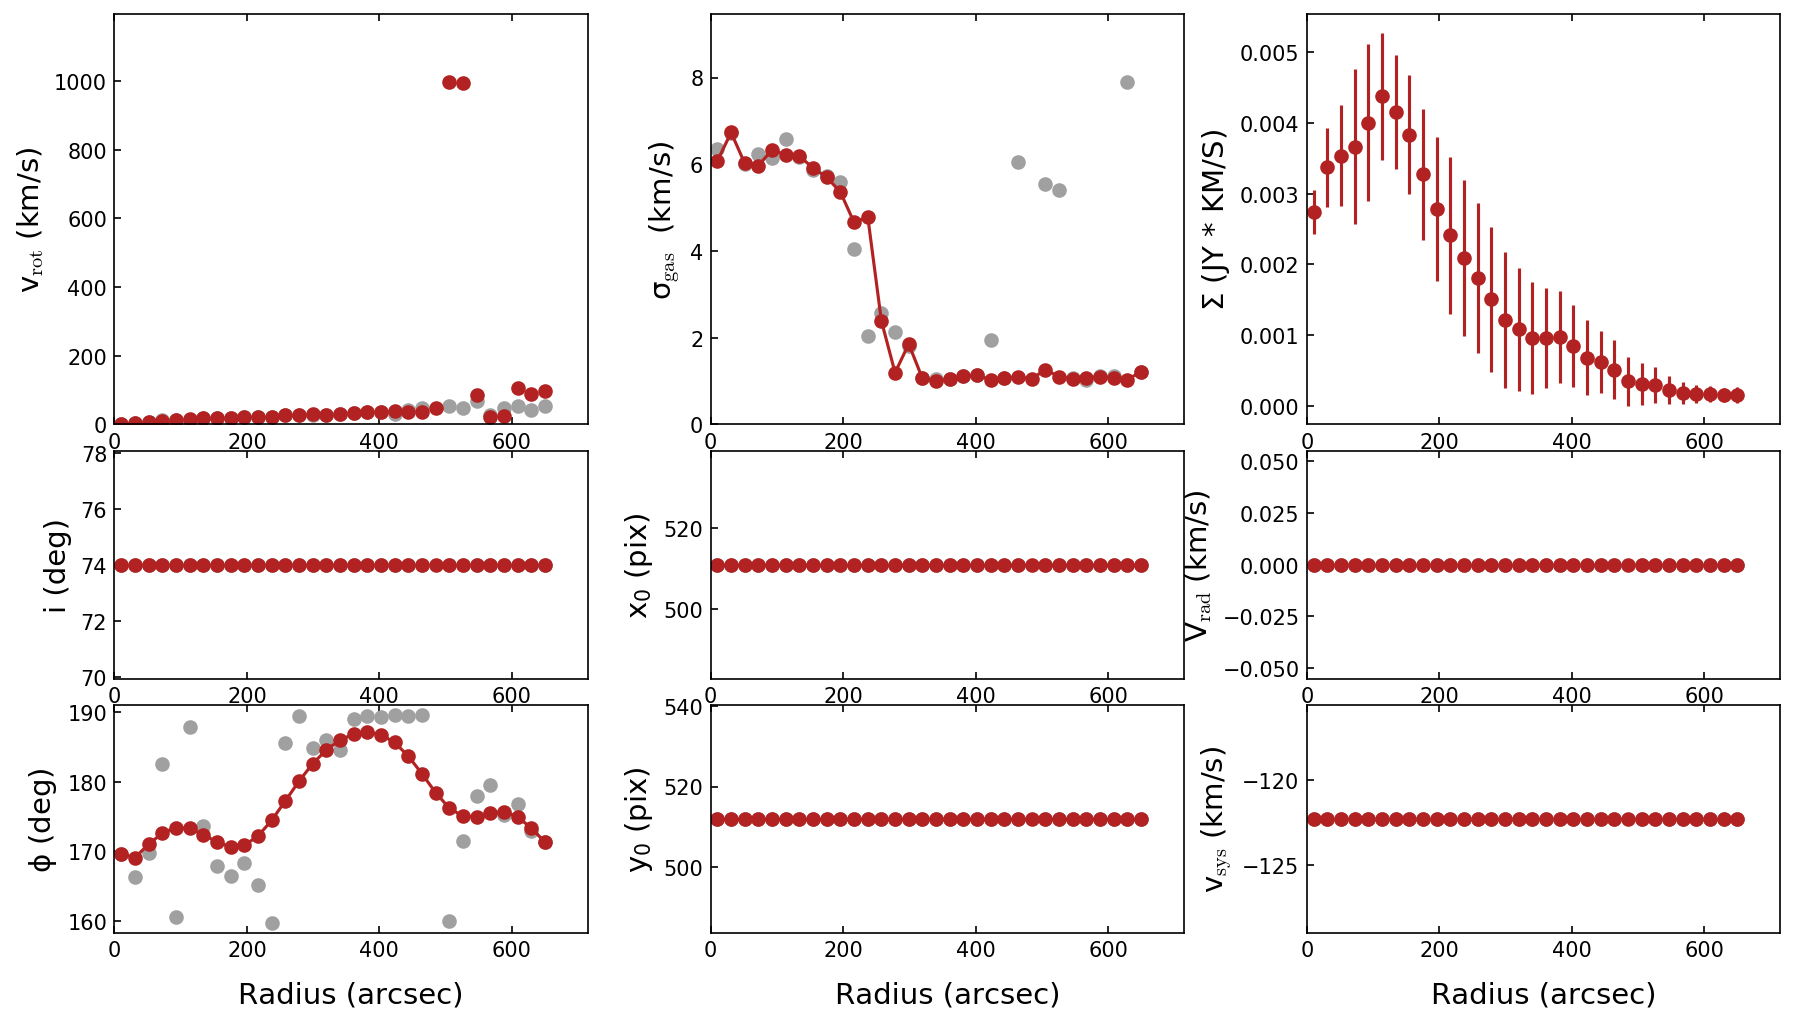

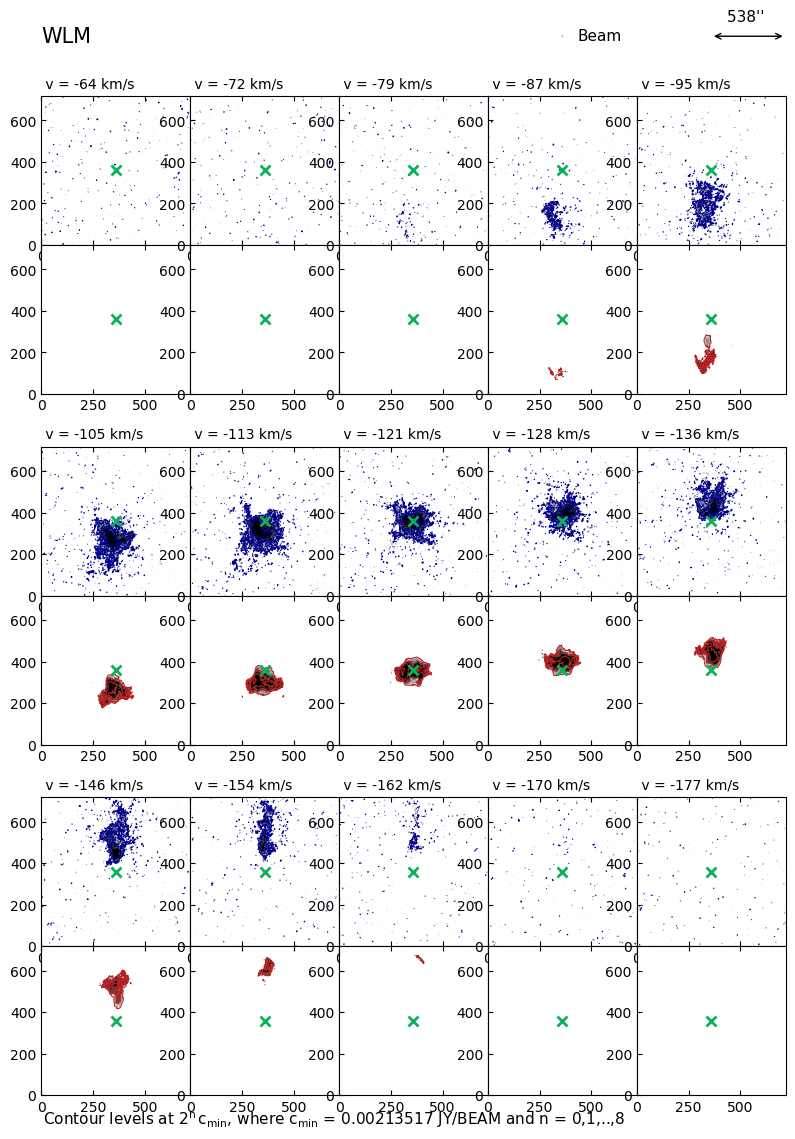

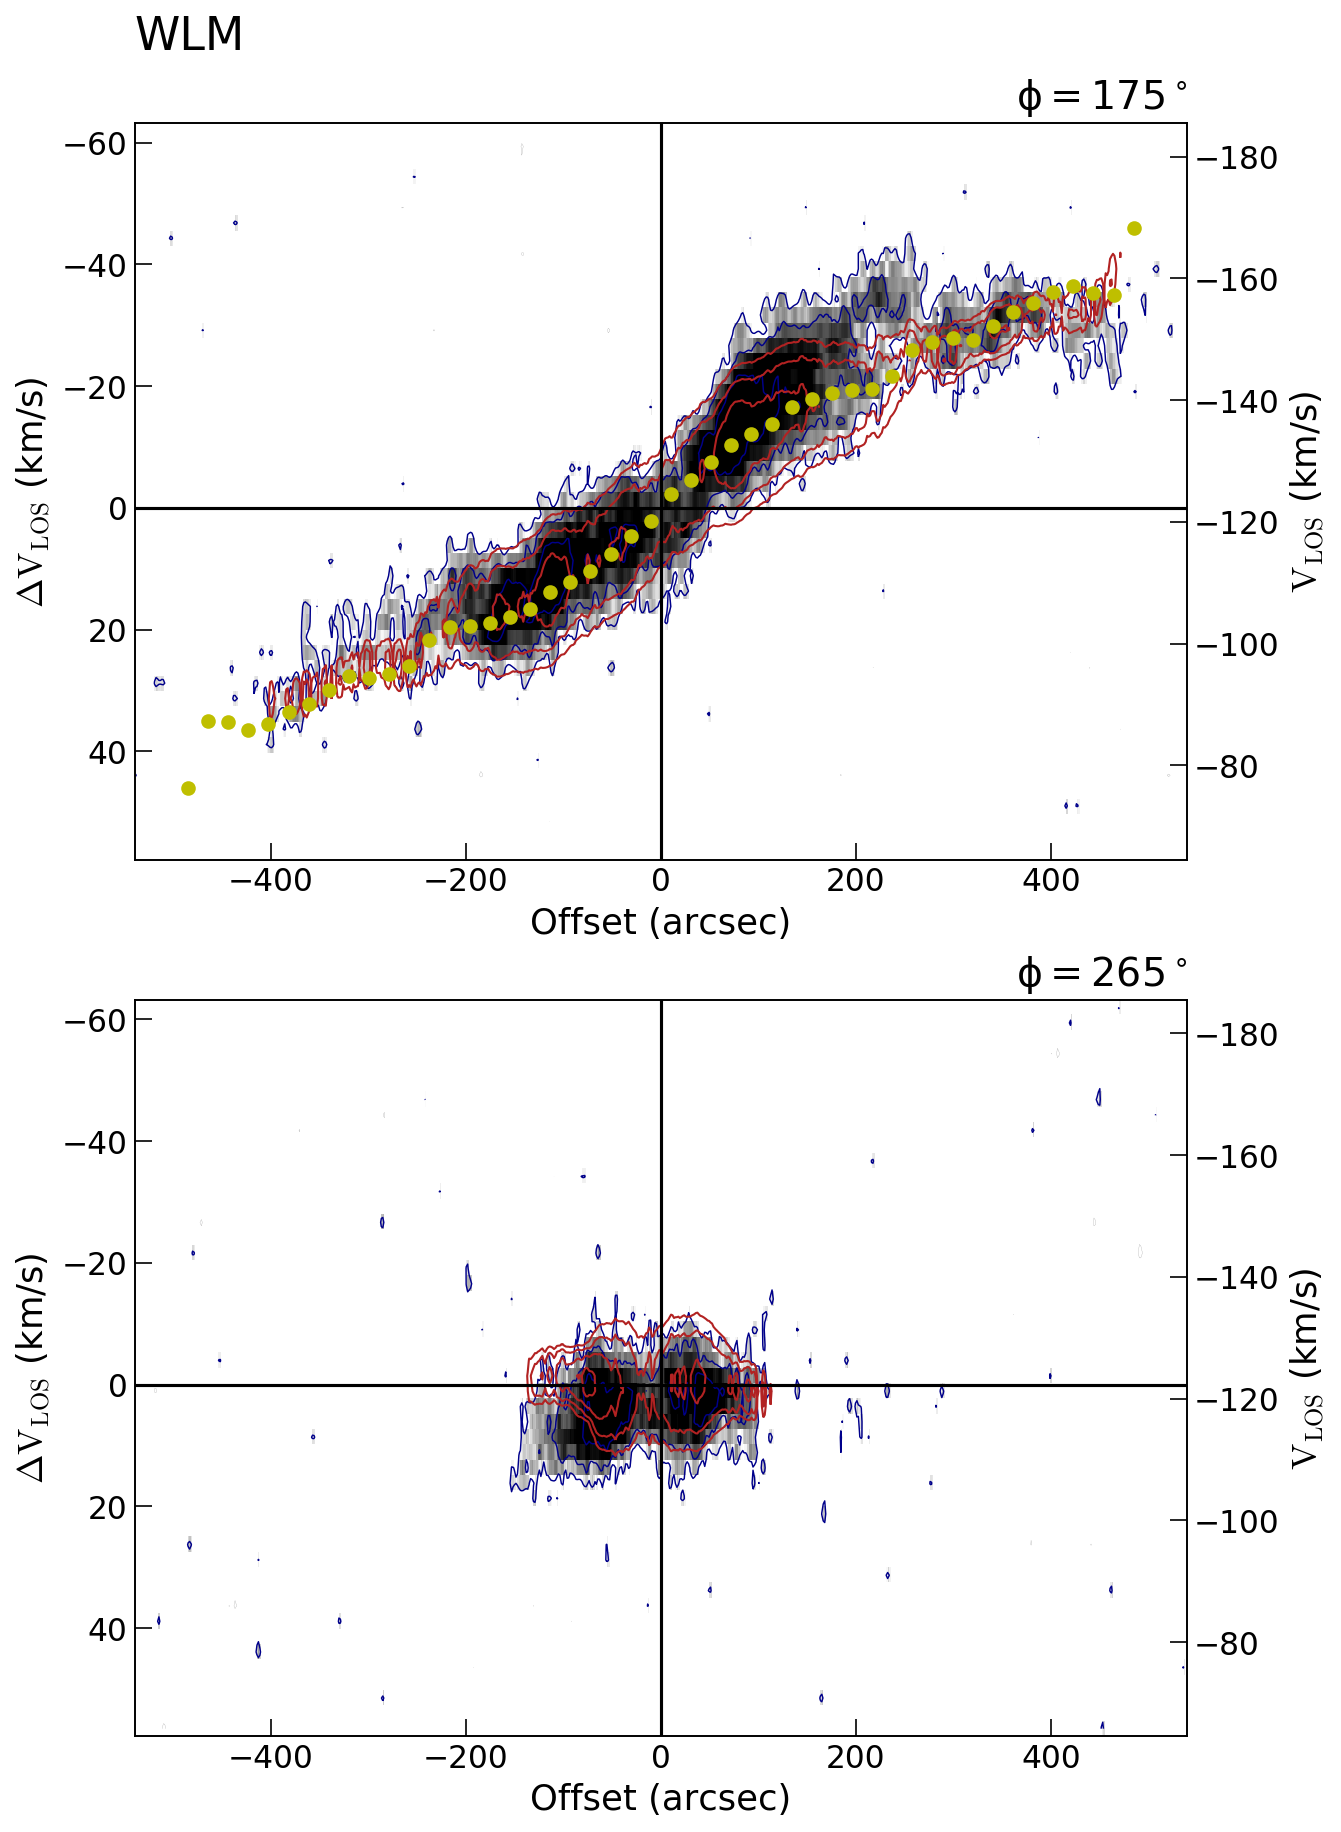

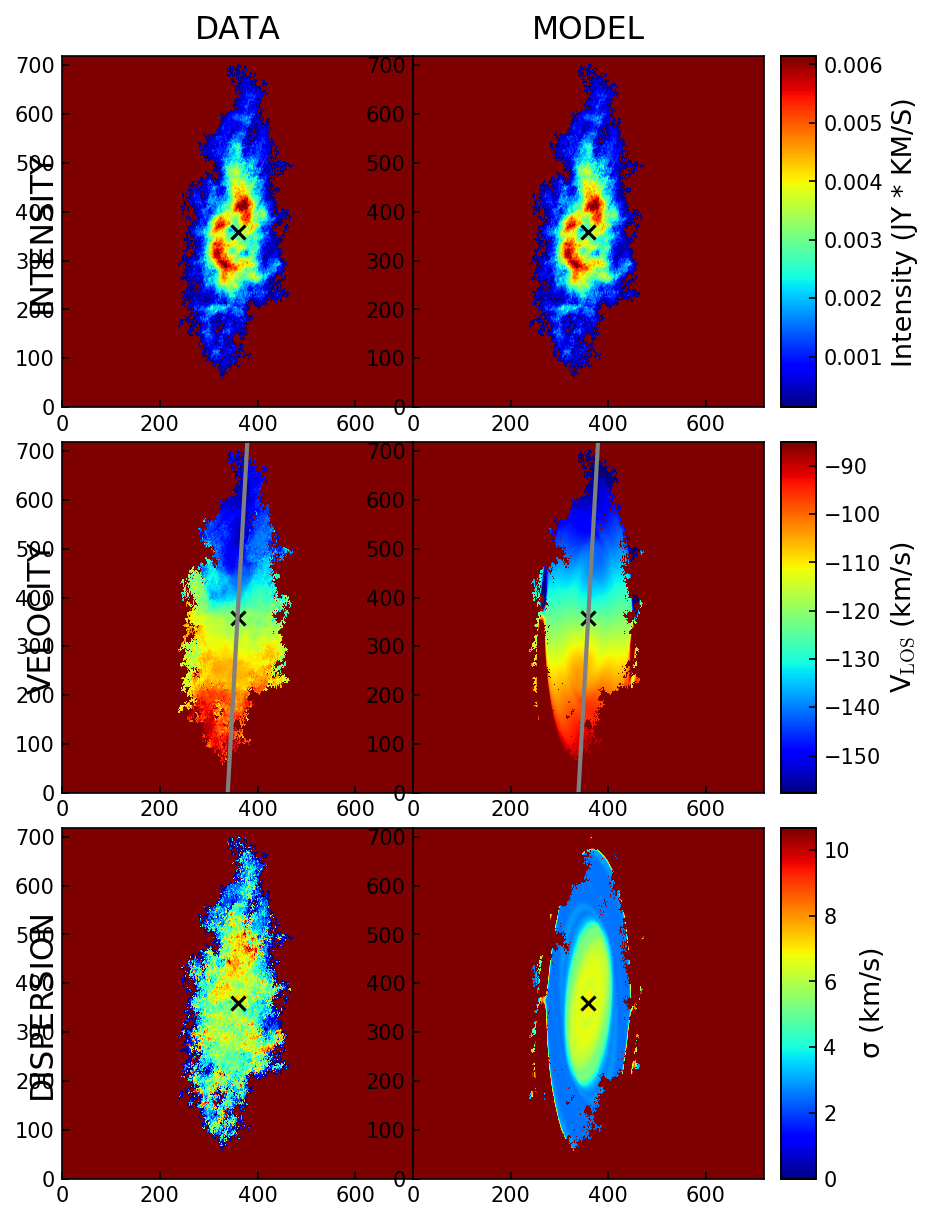

In [4]:
import numpy as np 
import os 
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import ColorbarBase 
from astropy.io import fits 
from astropy.visualization import LinearStretch, PowerStretch 
from astropy.visualization.mpl_normalize import ImageNormalize 
from astropy.visualization import PercentileInterval 
matplotlib.rc('xtick',direction='in') 
matplotlib.rc('ytick',direction='in') 

# PARAMETERS: plotting the fit parameters 
gname = 'WLM' 
outfolder = '/Applications/output/WLM/' 
file1 = outfolder+'ringlog1.txt' 
file2 = outfolder+'ringlog2.txt' 
filesb= outfolder+'densprof.txt' 
twostage=True 
plotmask=False 
rad,vrot,disp,inc,pa,z0,xpos,ypos,vsys,vrad = np.genfromtxt(file1,skip_header=1,usecols=(1,2,3,4,5,7,9,10,11,12),unpack=True) 
err1_l, err1_h = np.zeros(shape=(10,len(rad))), np.zeros(shape=(10,len(rad)))
color=color2='#B22222' 
max_vrot,max_vdisp,max_inc,max_pa=np.max(vrot),np.max(disp),np.max(inc),np.max(pa) 
max_z0,max_xpos,max_ypos,max_vsys=np.max(z0),np.max(xpos),np.max(ypos),np.max(vsys) 
max_rad = 1.1*np.max(rad) 

if twostage: 
	rad2, vrot2,disp2,inc2,pa2,z02,xpos2,ypos2,vsys2, vrad2 = np.genfromtxt(file2,skip_header=1,usecols=(1,2,3,4,5,7,9,10,11,12),unpack=True)
	err2_l, err2_h = np.zeros(shape=(10,len(rad2))), np.zeros(shape=(10,len(rad2)))
	color='#A0A0A0' 
	max_vrot,max_vdisp,max_inc,max_pa=np.maximum(max_vrot,np.max(vrot2)),np.maximum(max_vdisp,np.max(disp2)),np.maximum(max_inc,np.max(inc2)),np.maximum(max_pa,np.max(pa2)) 
	max_z0,max_xpos,max_ypos,max_vsys=np.maximum(max_z0,np.max(z02)),np.maximum(max_xpos,np.max(xpos2)),np.maximum(max_ypos,np.max(ypos2)),np.maximum(max_vsys,np.max(vsys2)) 

rad_sd, surfdens, sd_err = np.genfromtxt(filesb, usecols=(0,3,4),unpack=True) 
# Opening maps and retrieving intensity map units
f0 = fits.open(outfolder+'/maps/WLM_0mom.fits') 
f1 = fits.open(outfolder+'/maps/WLM_1mom.fits') 
f2 = fits.open(outfolder+'/maps/WLM_2mom.fits') 
bunit = f0[0].header['BUNIT'] 


fig1=plt.figure(figsize=(11.69,8.27), dpi=150)  
plt.rc('font',family='sans-serif',serif='Helvetica',size=10)  
params = {'text.usetex': False, 'mathtext.fontset': 'cm', 'mathtext.default': 'regular', 'errorbar.capsize': 0} 
plt.rcParams.update(params) 
fig_ratio = 11.69/8.27 
nrows, ncols = 3,3 
x_axis_length, y_axis_length = 0.27, 0.13 
x_sep, y_sep = 0.07,0.015 
ax, bottom_corner = [], [0.1,0.7]
for i in range (nrows): 
	bottom_corner[0], axcol, ylen = 0.1, [], y_axis_length 
	if i==0: ylen *= 1.8 
	for j in range (ncols): 
		axcol.append(fig1.add_axes([bottom_corner[0],bottom_corner[1],x_axis_length,ylen*fig_ratio])) 
		bottom_corner[0]+=x_axis_length+x_sep 
	ax.append(axcol) 
	bottom_corner[1]-=(y_axis_length+y_sep)*fig_ratio 

axis=ax[0][0]  
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')  
axis.set_xlim(0,max_rad)  
axis.set_ylim(0,1.2*max_vrot)  
axis.set_ylabel('v$_\mathrm{rot}$ (km/s)', fontsize=14)  
axis.errorbar(rad,vrot, yerr=[err1_l[0],-err1_h[0]],fmt='o', color=color)  
if twostage: axis.errorbar(rad2,vrot2, yerr=[err2_l[0],-err2_h[0]],fmt='o', color=color2) 

axis=ax[1][0]  
axis.set_xlim(0,max_rad)  
axis.set_ylabel('i (deg)', fontsize=14)  
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on') 
axis.errorbar(rad,inc, yerr=[err1_l[4],-err1_h[4]],fmt='o', color=color)  
if twostage: axis.errorbar(rad2,inc2,yerr=[err2_l[4],-err2_h[4]], fmt='o', color=color2) 

axis=ax[2][0]  
axis.set_xlim(0,max_rad)  
axis.set_ylabel('$\phi$ (deg)', fontsize=14)  
axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
axis.errorbar(rad,pa, yerr=[err1_l[5],-err1_h[5]],fmt='o', color=color)  
if twostage: axis.errorbar(rad2,pa2,yerr=[err2_l[5],-err2_h[5]], fmt='o-', color=color2)  

axis=ax[0][1]  
axis.set_xlim(0,max_rad)  
axis.set_ylim(0,1.2*max_vdisp)  
axis.set_ylabel('$\sigma_\mathrm{gas}$  (km/s)', fontsize=14)  
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on') 
axis.errorbar(rad,disp, yerr=[err1_l[1],-err1_h[1]],fmt='o', color=color)  
if twostage: axis.errorbar(rad2,disp2, yerr=[err2_l[1],-err2_h[1]],fmt='o-', color=color2)  

axis=ax[1][1]  
axis.set_xlim(0,max_rad)  
axis.set_ylabel('x$_0$ (pix)', fontsize=14)  
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')   
axis.errorbar(rad,xpos, yerr=[err1_l[6],-err1_h[6]],fmt='o', color=color)  
if twostage: axis.errorbar(rad2,xpos2,yerr=[err2_l[6],-err2_h[6]],fmt='o-', color=color2)  

axis=ax[2][1]  
axis.set_xlim(0,max_rad)  
axis.set_ylabel('y$_0$ (pix)', fontsize=14)  
axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
axis.errorbar(rad,ypos, yerr=[err1_l[7],-err1_h[7]],fmt='o', color=color)  
if twostage: axis.errorbar(rad2,ypos2, yerr=[err2_l[7],-err2_h[7]],fmt='o-', color=color2) 

axis=ax[0][2]  
axis.set_xlim(0,max_rad)  
axis.set_ylabel('$\Sigma}$ ('+bunit+')', fontsize=14)  
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='on')  
axis.errorbar(rad_sd,surfdens, yerr=sd_err,fmt='o', color=color2)  

axis=ax[1][2]  
axis.set_xlim(0,max_rad)  
axis.set_ylabel('V$_\mathrm{rad}$ (km/s)', fontsize=14)  
axis.tick_params(axis='both',which='both',bottom='off',top='on',labelbottom='off',labelleft='on')  
axis.errorbar(rad,vrad, yerr=[err1_l[9],-err1_h[9]],fmt='o', color=color)  
if twostage==True: axis.errorbar(rad2,vrad2,yerr=[err2_l[9],-err2_h[9]],fmt='o', color=color2)  

axis=ax[2][2]  
axis.set_xlim(0,max_rad) 
axis.set_ylabel('v$_\mathrm{sys}$ (km/s)', fontsize=14) 
axis.set_xlabel('Radius (arcsec)', fontsize=14, labelpad=10) 
axis.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='on',labelleft='on')  
axis.errorbar(rad,vsys, yerr=[err1_l[8],-err1_h[8]],fmt='o', color=color)  
if twostage==True: axis.errorbar(rad2,vsys2,yerr=[err2_l[8],-err2_h[8]],fmt='o', color=color2) 

plt.savefig(outfolder+'plot_parameters.pdf', orientation = 'landscape', format = 'pdf',bbox_inches='tight') 


# CHANNEL MAPS: Setting all the needed variables 
image = fits.open('/Applications/Astrophysics_Research/WLM_NA_ICL001.FITS') 
image_mas = fits.open(outfolder+'mask.fits') 
xmin, xmax = 152, 870
ymin, ymax = 153, 871
zmin, zmax = 33, 80
data = image[0].data[0,zmin:zmax+1,ymin:ymax+1,xmin:xmax+1] 
data_mas = image_mas[0].data[zmin:zmax+1,ymin:ymax+1,xmin:xmax+1] 
head = image[0].header 
zsize=data[:,0,0].size 
cdeltsp=1.5
cont = 0.00213517
v = np.array([1,2,4,8,16,32,64])*cont 
v_neg = [-cont] 
interval = PercentileInterval(99.5) 
vmax = interval.get_limits(data)[1] 
norm = ImageNormalize(vmin=cont, vmax=vmax, stretch=PowerStretch(0.5)) 

files_mod, typ = [], [] 
for thisFile in os.listdir(outfolder): 
	if 'mod_azim.fits'  in thisFile: files_mod.append(thisFile) 

if len(files_mod)==1: typ.append('AZIM') 

for thisFile in os.listdir(outfolder): 
	if 'mod_local.fits'  in thisFile: files_mod.append(thisFile) 

if len(files_mod)==2: typ.append('LOCAL') 
elif (len(files_mod)==1 and len(typ)==0): typ.append('LOCAL') 
elif (len(files_mod)==len(typ)==0): exit() 

# Beginning channel map plot 
xcen, ycen, phi = [np.nanmean(xpos)-xmin,np.nanmean(ypos)-ymin,np.nanmean(pa)] 
if twostage==True: xcen, ycen, phi = [np.nanmean(xpos2)-xmin,np.nanmean(ypos2)-ymin,np.nanmean(pa2)] 
for k in range (len(files_mod)): 
	image_mod = fits.open(outfolder+files_mod[k]) 
	data_mod = image_mod[0].data[zmin:zmax+1,ymin:ymax+1,xmin:xmax+1] 
	plt.figure(figsize=(8.27, 11.69), dpi=100) 
	grid = [gridspec.GridSpec(2,5),gridspec.GridSpec(2,5),gridspec.GridSpec(2,5)] 
	grid[0].update(top=0.90, bottom=0.645, left=0.05, right=0.95, wspace=0.0, hspace=0.0) 
	grid[1].update(top=0.60, bottom=0.345, left=0.05, right=0.95, wspace=0.0, hspace=0.0) 
	grid[2].update(top=0.30, bottom=0.045, left=0.05, right=0.95, wspace=0.0, hspace=0.0) 
	matplotlib.rcParams['contour.negative_linestyle'] = 'solid' 

	num = 0 
	for j in range (0,3): 
		for i in range (0,5): 
			chan = int(num*(zsize)/15) 
			z = data[chan,:,:] 
			z_mod = data_mod[chan,:,:] 
			#New matplotlib draws wrong contours when no contours are found. This is a workaround.
			if np.all(z_mod<v[0]): z_mod[:,:] =0
			velo_kms = (chan+1-21)*-2.57457+-116
			velo = ' v = ' + str(int(velo_kms)) + ' km/s' 
			ax = plt.subplot(grid[j][0,i]) 
			ax.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='off') 
			ax.set_title(velo, fontsize=10,loc='left') 
			ax.imshow(z,origin='lower',cmap = matplotlib.cm.Greys,norm=norm,aspect='auto',interpolation='none') 
			ax.contour(z,v,origin='lower',linewidths=0.7,colors='#00008B') 
			ax.contour(z,v_neg,origin='lower',linewidths=0.1,colors='gray') 
			ax.plot(xcen,ycen,'x',color='#0FB05A',markersize=7,mew=2) 
			if plotmask: 
				ax.contour(data_mas[chan],[1],origin='lower',linewidths=2,colors='k') 
			if (j==i==0): 
				ax.text(0, 1.4, gname, transform=ax.transAxes,fontsize=15,va='center') 
				lbar = 0.5*(xmax-xmin)*cdeltsp 
				ltex = "%.0f'' "%lbar if lbar>10 else "%.2f'' "%lbar 
				if lbar>600: ltex = "%.0f' "%(lbar/60.) 
				ax.annotate('', xy=(4.5, 1.4), xycoords='axes fraction', xytext=(5, 1.4),arrowprops=dict(arrowstyle='<->', color='k'))
				ax.text(4.75,1.50,ltex,transform=ax.transAxes,fontsize=11, ha='center')
				bmaj, bmin, bpa = 7.07112/float(xmax-xmin), 4.926/float(ymax-ymin),-14.25
				beam = matplotlib.patches.Ellipse((3.5, 1.4), bmaj, bmin, bpa, color='#5605D0', clip_on=False, transform=ax.transAxes, alpha=0.2) 
				ax.add_artist(beam) 
				ax.text(3.6+bmaj/1.8,1.4,'Beam',transform=ax.transAxes,fontsize=11, ha='left',va='center') 
			ax = plt.subplot(grid[j][1,i]) 
			ax.tick_params(axis='both',which='both',bottom='on',top='on',labelbottom='off',labelleft='off') 
			ax.imshow(z_mod,origin='lower',cmap = matplotlib.cm.Greys,norm=norm,aspect='auto',interpolation='none') 
			ax.contour(z_mod,v,origin='lower',linewidths=0.7,colors='#B22222') 
			ax.plot(xcen,ycen,'x',color='#0FB05A',markersize=7,mew=2) 
			if (i==0 and j==2): 
				clab = 'Contour levels at 2$^n \, c_{min}$, where $c_{min}$ = %s JY/BEAM and n = 0,1,..,8 '%cont 
				ax.text(0.01,-0.16,clab,transform=ax.transAxes,fontsize=11, ha='left',va='center') 
			num = num+1 

	outfile = 'plot_chanmaps.pdf' 
	if (typ[k]=='AZIM'): outfile = 'plot_chanmaps_azim.pdf' 
	if (typ[k]=='LOCAL'): outfile = 'plot_chanmaps_local.pdf' 
	plt.savefig(outfolder+outfile, orientation = 'portrait', format = 'pdf') 
	image_mod.close() 

image.close() 


# Now plotting the position-velocity diagrams 
files_pva_mod, files_pvb_mod = [], [] 
for thisFile in os.listdir(outfolder+'pvs/'): 
	if 'pv_a_azim.fits' in thisFile: files_pva_mod.append(thisFile) 
	if 'pv_b_azim.fits' in thisFile: files_pvb_mod.append(thisFile) 

for thisFile in os.listdir(outfolder+'pvs/'): 
	if 'pv_a_local.fits' in thisFile: files_pva_mod.append(thisFile) 
	if 'pv_b_local.fits' in thisFile: files_pvb_mod.append(thisFile) 

image_maj     = fits.open(outfolder+'pvs/'+gname+'_pv_a.fits') 
image_min     = fits.open(outfolder+'pvs/'+gname+'_pv_b.fits') 
image_mas_maj = fits.open(outfolder+'pvs/'+gname+'mask_pv_a.fits') 
image_mas_min = fits.open(outfolder+'pvs/'+gname+'mask_pv_b.fits') 
head = [image_maj[0].header,image_min[0].header] 
crpixpv = np.array([head[0]['CRPIX1'],head[1]['CRPIX1']]) 
cdeltpv = np.array([head[0]['CDELT1'],head[1]['CDELT1']]) 
crvalpv = np.array([head[0]['CRVAL1'],head[1]['CRVAL1']]) 
xminpv, xmaxpv = np.floor(crpixpv-1-359), np.ceil(crpixpv-1 +359) 
if xminpv[0]<0: xminpv[0]=0 
if xminpv[1]<0: xminpv[1]=0 
if xmaxpv[0]>=head[0]['NAXIS1']: xmaxpv[0]=head[0]['NAXIS1']-1 
if xmaxpv[1]>=head[1]['NAXIS1']: xmaxpv[1]=head[1]['NAXIS1']-1 
data_maj = image_maj[0].data[zmin:zmax+1,int(xminpv[0]):int(xmaxpv[0])+1] 
data_min = image_min[0].data[zmin:zmax+1,int(xminpv[1]):int(xmaxpv[1])+1] 
data_mas_maj = image_mas_maj[0].data[zmin:zmax+1,int(xminpv[0]):int(xmaxpv[0])+1] 
data_mas_min = image_mas_min[0].data[zmin:zmax+1,int(xminpv[1]):int(xmaxpv[1])+1] 
xmin_wcs = ((xminpv+1-crpixpv)*cdeltpv+crvalpv)*3600
xmax_wcs = ((xmaxpv+1-crpixpv)*cdeltpv+crvalpv)*3600
zmin_wcs, zmax_wcs = -64.5086, -185.513

radius = np.concatenate((rad,-rad)) 
vrotation, inclin, vsystem, posang = vrot, inc, vsys, pa  
if twostage==True:
 	radius, vrotation, inclin, vsystem, posang = np.concatenate((rad2,-rad2)), vrot2, inc2, vsys2, pa2 
vlos1 = vrotation*np.sin(np.deg2rad(inclin))+vsystem 
vlos2 = vsystem-vrotation*np.sin(np.deg2rad(inclin)) 
reverse = True 
if reverse==True: vlos1, vlos2 = vlos2, vlos1 
vlos = np.concatenate((vlos1,vlos2)) 
vsysmean, pamean = np.nanmean(vsystem), np.nanmean(posang) 
ext = [[xmin_wcs[0],xmax_wcs[0],zmin_wcs-vsysmean,zmax_wcs-vsysmean],\
       [xmin_wcs[1],xmax_wcs[1],zmin_wcs-vsysmean,zmax_wcs-vsysmean]] 
labsize = 15 
palab = ['$\phi = $175$^\circ$', '$\phi = $265$^\circ$'] 

# Beginning PV plot 
for k in range (len(files_mod)): 
	image_mod_maj = fits.open(outfolder+'pvs/'+files_pva_mod[k]) 
	image_mod_min = fits.open(outfolder+'pvs/'+files_pvb_mod[k]) 
	data_mod_maj = image_mod_maj[0].data[zmin:zmax+1,int(xminpv[0]):int(xmaxpv[0])+1] 
	data_mod_min = image_mod_min[0].data[zmin:zmax+1,int(xminpv[1]):int(xmaxpv[1])+1] 
	toplot = [[data_maj,data_min],[data_mod_maj,data_mod_min],[data_mas_maj,data_mas_min]] 

	fig=plt.figure(figsize=(11.69,8.27), dpi=150) 
	fig_ratio = 11.69/8.27 
	x_len, y_len, y_sep = 0.6, 0.42, 0.08 
	ax, bottom_corner = [], [0.1,0.7] 
	for i in range (2): 
		bottom_corner[0], axcol = 0.1, [] 
		ax.append(fig.add_axes([bottom_corner[0],bottom_corner[1],x_len,y_len*fig_ratio])) 
		bottom_corner[1]-=(y_len+y_sep)*fig_ratio 

	for i in range (2): 
		axis = ax[i] 
		axis.tick_params(which='major',length=8, labelsize=labsize) 
		axis.set_xlabel('Offset (arcsec)',fontsize=labsize+2) 
		axis.set_ylabel('$\mathrm{\Delta V_{LOS}}$ (km/s)',fontsize=labsize+2) 
		axis.text(1, 1.02,palab[i],ha='right',transform=axis.transAxes,fontsize=labsize+4) 
		axis2 = axis.twinx() 
		axis2.set_xlim([ext[i][0],ext[i][1]]) 
		axis2.set_ylim([ext[i][2]+vsysmean,ext[i][3]+vsysmean]) 
		axis2.tick_params(which='major',length=8, labelsize=labsize) 
		axis2.set_ylabel('$\mathrm{V_{LOS}}$ (km/s)',fontsize=labsize+2) 
		axis.imshow(toplot[0][i],origin='lower',cmap = matplotlib.cm.Greys,norm=norm,extent=ext[i],aspect='auto') 
		axis.contour(toplot[0][i],v,origin='lower',linewidths=0.7,colors='#00008B',extent=ext[i]) 
		axis.contour(toplot[0][i],v_neg,origin='lower',linewidths=0.1,colors='gray',extent=ext[i]) 
		axis.contour(toplot[1][i],v,origin='lower',linewidths=1,colors='#B22222',extent=ext[i]) 
		axis.axhline(y=0,color='black') 
		axis.axvline(x=0,color='black') 
		if plotmask: 
			axis.contour(toplot[2][i],[1],origin='lower',linewidths=2,colors='k',extent=ext[i]) 
		if i==0 : 
			axis2.plot(radius,vlos,'yo') 
			axis.text(0, 1.1, gname, transform=axis.transAxes,fontsize=22) 

	outfile = 'plot_pv.pdf' 
	if (typ[k]=='AZIM'): outfile = 'plot_pv_azim.pdf' 
	if (typ[k]=='LOCAL'): outfile = 'plot_pv_local.pdf' 
	plt.savefig(outfolder+outfile, bbox_inches='tight') 
	image_mod_maj.close() 
	image_mod_min.close() 

image_maj.close() 
image_min.close() 

# Now plotting moment maps 
mom0 = f0[0].data[ymin:ymax+1,xmin:xmax+1] 
mom1 = f1[0].data[ymin:ymax+1,xmin:xmax+1] 
mom2 = f2[0].data[ymin:ymax+1,xmin:xmax+1] 

files_mod0, files_mod1, files_mod2 = [], [], [] 
for thisFile in os.listdir(outfolder+'/maps/'): 
	if 'azim_0mom.fits' in thisFile: files_mod0.append(thisFile) 
	if 'azim_1mom.fits' in thisFile: files_mod1.append(thisFile) 
	if 'azim_2mom.fits' in thisFile: files_mod2.append(thisFile) 

for thisFile in os.listdir(outfolder+'maps/'): 
	if 'local_0mom.fits' in thisFile: files_mod0.append(thisFile) 
	if 'local_1mom.fits' in thisFile: files_mod1.append(thisFile) 
	if 'local_2mom.fits' in thisFile: files_mod2.append(thisFile) 

norm0 = ImageNormalize(vmin=interval.get_limits(mom0)[0],vmax=interval.get_limits(mom0)[1], stretch=LinearStretch()) 
norm1 = ImageNormalize(vmin=interval.get_limits(mom1)[0],vmax=interval.get_limits(mom1)[1], stretch=LinearStretch()) 
norm2 = ImageNormalize(vmin=interval.get_limits(mom2)[0],vmax=interval.get_limits(mom2)[1], stretch=LinearStretch()) 
norm = [norm0, norm1, norm2] 
cmaps = [matplotlib.cm.jet,matplotlib.cm.jet,matplotlib.cm.jet] 
barlab = ['Intensity ('+bunit+')', 'V$_\mathrm{LOS}$ (km/s)', '$\sigma$ (km/s)'] 
titles = ['DATA', 'MODEL'] 
mapname = ['INTENSITY', 'VELOCITY', 'DISPERSION'] 

x = np.arange(0,xmax-xmin,0.1) 
y = np.tan(np.radians(phi-90))*(x-xcen)+ycen 
ext = [0,xmax-xmin,0, ymax-ymin] 

for k in range (len(files_mod0)): 
	mom0_mod = fits.open(outfolder+'/maps/'+files_mod0[k])[0].data[ymin:ymax+1,xmin:xmax+1] 
	mom1_mod = fits.open(outfolder+'/maps/'+files_mod1[k])[0].data[ymin:ymax+1,xmin:xmax+1] 
	mom2_mod = fits.open(outfolder+'/maps/'+files_mod2[k])[0].data[ymin:ymax+1,xmin:xmax+1] 
	to_plot = [[mom0,mom1,mom2],[mom0_mod,mom1_mod,mom2_mod]] 

	fig=plt.figure(figsize=(11.69,8.27), dpi=150) 
	fig_ratio = 11.69/8.27 
	nrows, ncols = 3, 2 
	x_len, y_len = 0.2, 0.2 
	x_sep, y_sep = 0.00,0.02 
	ax, ax_cb, bottom_corner = [], [], [0.1,0.7] 
	for i in range (nrows): 
		bottom_corner[0], axcol = 0.1, [] 
		for j in range (ncols): 
			axcol.append(fig.add_axes([bottom_corner[0],bottom_corner[1],x_len,y_len*fig_ratio])) 
			bottom_corner[0]+=x_len+x_sep 
		ax.append(axcol) 
		ax_cb.append(fig.add_axes([bottom_corner[0]+0.01,bottom_corner[1],0.02,y_len*fig_ratio])) 
		bottom_corner[1]-=(y_len+y_sep)*fig_ratio 

	for i in range (nrows): 
		for j in range (ncols): 
			axis = ax[i][j] 
			axis.tick_params(labelbottom='off',labelleft='off') 
			axis.set_xlim(ext[0],ext[1]) 
			axis.set_ylim(ext[2],ext[3]) 
			axis.imshow(to_plot[j][i],origin='lower',cmap=cmaps[i],norm=norm[i],aspect='auto',extent=ext) 
			axis.plot(xcen,ycen,'x',color='#000000',markersize=7,mew=1.5) 

			cb = ColorbarBase(ax_cb[i], orientation='vertical', cmap=cmaps[i], norm=norm[i]) 
			cb.solids.set_edgecolor('face') 
			cb.set_label(barlab[i],fontsize=13) 

			if i==0: axis.text(0.5,1.05,titles[j],ha='center',transform=axis.transAxes,fontsize=15) 
			elif i==1: axis.plot(x,y,color='#808080',linewidth=2) 
			if j==0: axis.text(-0.1,0.5,mapname[i],va='center',rotation=90,transform=axis.transAxes,fontsize=15) 

	if (typ[k]=='AZIM'): outfile = 'plot_maps_azim.pdf' 
	if (typ[k]=='LOCAL'): outfile = 'plot_maps_local.pdf' 
	plt.savefig(outfolder+outfile, bbox_inches = 'tight') 
